In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('drug200.csv')

In [3]:
k=df.isnull()

<AxesSubplot:>

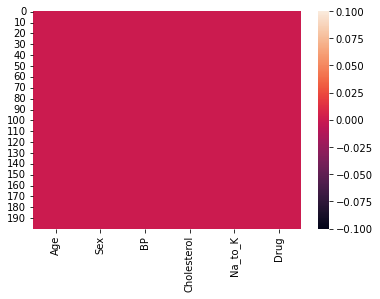

In [4]:
sns.heatmap(data=k)

In [5]:
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [43]:
cholestrol = pd.get_dummies(df['Cholesterol'])

In [44]:
cholestrol.columns

Index(['HIGH', 'NORMAL'], dtype='object')

In [45]:
df['Cholesterol']= cholestrol.drop('NORMAL',axis=1)

In [46]:
male = pd.get_dummies(df['Sex'])

In [47]:
male.columns

Index(['F', 'M'], dtype='object')

In [48]:
df['Sex']= male.drop('F',axis=1)

In [49]:
bp = pd.get_dummies(data=df['BP'])

In [50]:
df[['BP H','BP L']]= bp.drop('NORMAL',axis=1)

In [51]:
df.drop('BP',inplace=True,axis=1)

In [52]:
drug = pd.get_dummies(data=df['Drug'])

In [53]:
final_dataset=pd.concat([df,drug],axis=1)

In [54]:
final_dataset.drop('Drug',axis=1,inplace=True)

In [55]:
final_dataset

,Age,Sex,Cholesterol,Na_to_K,BP H,BP L,DrugY,drugA,drugB,drugC,drugX
0,23,0,1,25.355,1,0,1,0,0,0,0
1,47,1,1,13.093,0,1,0,0,0,1,0
2,47,1,1,10.114,0,1,0,0,0,1,0
3,28,0,1,7.798,0,0,0,0,0,0,1
4,61,0,1,18.043,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
195,56,0,1,11.567,0,1,0,0,0,1,0
196,16,1,1,12.006,0,1,0,0,0,1,0
197,52,1,1,9.894,0,0,0,0,0,0,1
198,23,1,0,14.020,0,0,0,0,0,0,1


In [58]:
X=final_dataset[['Age','Sex','Cholesterol','Na_to_K','BP H','BP L']]

In [59]:
y=final_dataset[['DrugY','drugA','drugB','drugC','drugX']]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
from xgboost import XGBClassifier

In [24]:
xgb = XGBClassifier()

In [25]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [26]:
predictions = xgb.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9545454545454546

In [56]:
#########################################################

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
194,46,F,HIGH,HIGH,34.686,DrugY
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX


In [60]:
X

,Age,Sex,Cholesterol,Na_to_K,BP H,BP L
0,23,0,1,25.355,1,0
1,47,1,1,13.093,0,1
2,47,1,1,10.114,0,1
3,28,0,1,7.798,0,0
4,61,0,1,18.043,0,1
...,...,...,...,...,...,...
195,56,0,1,11.567,0,1
196,16,1,1,12.006,0,1
197,52,1,1,9.894,0,0
198,23,1,0,14.020,0,0


In [61]:
y = df['Drug']

In [62]:
from lightgbm import LGBMClassifier

In [63]:
lg = LGBMClassifier()

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
lg.fit(X_train,y_train)

LGBMClassifier()

In [66]:
lg_predictions=lg.predict(X_test)

In [67]:
lg_predictions

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'DrugY', 'drugA',
       'drugB', 'DrugY', 'drugB', 'drugX', 'drugC', 'DrugY', 'drugB',
       'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugC', 'drugX',
       'DrugY', 'drugX', 'DrugY', 'drugC', 'drugC', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'drugA', 'DrugY', 'drugA', 'drugX', 'drugX',
       'drugX', 'DrugY', 'DrugY', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY',
       'drugA', 'DrugY', 'DrugY', 'DrugY'], dtype=object)

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,lg_predictions)

1.0

In [69]:
######################################################################

In [70]:
from catboost import CatBoostClassifier

In [71]:
cb = CatBoostClassifier()

In [72]:
cb.fit(X_train,y_train)

Learning rate set to 0.071577
0:	learn: 1.4770776	total: 133ms	remaining: 2m 12s
1:	learn: 1.3949647	total: 136ms	remaining: 1m 7s
2:	learn: 1.3368832	total: 139ms	remaining: 46.1s
3:	learn: 1.2981791	total: 141ms	remaining: 35.2s
4:	learn: 1.2611970	total: 144ms	remaining: 28.7s
5:	learn: 1.2169880	total: 148ms	remaining: 24.5s
6:	learn: 1.1625889	total: 152ms	remaining: 21.6s
7:	learn: 1.1046313	total: 154ms	remaining: 19.2s
8:	learn: 1.0566253	total: 157ms	remaining: 17.3s
9:	learn: 1.0072336	total: 159ms	remaining: 15.7s
10:	learn: 0.9654699	total: 161ms	remaining: 14.5s
11:	learn: 0.9276628	total: 164ms	remaining: 13.5s
12:	learn: 0.8929063	total: 167ms	remaining: 12.7s
13:	learn: 0.8591936	total: 169ms	remaining: 11.9s
14:	learn: 0.8201769	total: 173ms	remaining: 11.4s
15:	learn: 0.7796243	total: 175ms	remaining: 10.8s
16:	learn: 0.7473199	total: 178ms	remaining: 10.3s
17:	learn: 0.7251249	total: 181ms	remaining: 9.87s
18:	learn: 0.7044369	total: 184ms	remaining: 9.52s
19:	learn:

189:	learn: 0.0498454	total: 694ms	remaining: 2.96s
190:	learn: 0.0495393	total: 697ms	remaining: 2.95s
191:	learn: 0.0492318	total: 700ms	remaining: 2.94s
192:	learn: 0.0488706	total: 702ms	remaining: 2.94s
193:	learn: 0.0485686	total: 706ms	remaining: 2.93s
194:	learn: 0.0482222	total: 709ms	remaining: 2.93s
195:	learn: 0.0478868	total: 713ms	remaining: 2.92s
196:	learn: 0.0476170	total: 717ms	remaining: 2.92s
197:	learn: 0.0472704	total: 720ms	remaining: 2.92s
198:	learn: 0.0469681	total: 724ms	remaining: 2.91s
199:	learn: 0.0466837	total: 727ms	remaining: 2.91s
200:	learn: 0.0464269	total: 730ms	remaining: 2.9s
201:	learn: 0.0461695	total: 734ms	remaining: 2.9s
202:	learn: 0.0459035	total: 737ms	remaining: 2.89s
203:	learn: 0.0456307	total: 740ms	remaining: 2.89s
204:	learn: 0.0453742	total: 743ms	remaining: 2.88s
205:	learn: 0.0451678	total: 745ms	remaining: 2.87s
206:	learn: 0.0449069	total: 749ms	remaining: 2.87s
207:	learn: 0.0446677	total: 752ms	remaining: 2.86s
208:	learn: 0.

349:	learn: 0.0239748	total: 1.21s	remaining: 2.25s
350:	learn: 0.0238871	total: 1.22s	remaining: 2.25s
351:	learn: 0.0238162	total: 1.22s	remaining: 2.25s
352:	learn: 0.0237458	total: 1.22s	remaining: 2.24s
353:	learn: 0.0236745	total: 1.23s	remaining: 2.24s
354:	learn: 0.0236014	total: 1.23s	remaining: 2.23s
355:	learn: 0.0235319	total: 1.23s	remaining: 2.23s
356:	learn: 0.0234549	total: 1.24s	remaining: 2.23s
357:	learn: 0.0233862	total: 1.24s	remaining: 2.23s
358:	learn: 0.0233126	total: 1.24s	remaining: 2.22s
359:	learn: 0.0232450	total: 1.25s	remaining: 2.22s
360:	learn: 0.0231775	total: 1.25s	remaining: 2.21s
361:	learn: 0.0231096	total: 1.25s	remaining: 2.21s
362:	learn: 0.0230258	total: 1.26s	remaining: 2.2s
363:	learn: 0.0229363	total: 1.26s	remaining: 2.2s
364:	learn: 0.0228475	total: 1.26s	remaining: 2.2s
365:	learn: 0.0227771	total: 1.26s	remaining: 2.19s
366:	learn: 0.0226925	total: 1.27s	remaining: 2.19s
367:	learn: 0.0226093	total: 1.27s	remaining: 2.18s
368:	learn: 0.0

513:	learn: 0.0154346	total: 1.74s	remaining: 1.64s
514:	learn: 0.0154042	total: 1.74s	remaining: 1.64s
515:	learn: 0.0153741	total: 1.75s	remaining: 1.64s
516:	learn: 0.0153418	total: 1.75s	remaining: 1.63s
517:	learn: 0.0153034	total: 1.75s	remaining: 1.63s
518:	learn: 0.0152737	total: 1.76s	remaining: 1.63s
519:	learn: 0.0152434	total: 1.76s	remaining: 1.62s
520:	learn: 0.0152139	total: 1.76s	remaining: 1.62s
521:	learn: 0.0151839	total: 1.77s	remaining: 1.62s
522:	learn: 0.0151472	total: 1.77s	remaining: 1.61s
523:	learn: 0.0151175	total: 1.77s	remaining: 1.61s
524:	learn: 0.0150840	total: 1.77s	remaining: 1.61s
525:	learn: 0.0150545	total: 1.78s	remaining: 1.6s
526:	learn: 0.0150251	total: 1.78s	remaining: 1.6s
527:	learn: 0.0149948	total: 1.78s	remaining: 1.59s
528:	learn: 0.0149662	total: 1.79s	remaining: 1.59s
529:	learn: 0.0149340	total: 1.79s	remaining: 1.59s
530:	learn: 0.0149001	total: 1.79s	remaining: 1.58s
531:	learn: 0.0148718	total: 1.8s	remaining: 1.58s
532:	learn: 0.0

685:	learn: 0.0112591	total: 2.26s	remaining: 1.03s
686:	learn: 0.0112426	total: 2.26s	remaining: 1.03s
687:	learn: 0.0112234	total: 2.26s	remaining: 1.03s
688:	learn: 0.0112049	total: 2.27s	remaining: 1.02s
689:	learn: 0.0111885	total: 2.27s	remaining: 1.02s
690:	learn: 0.0111678	total: 2.27s	remaining: 1.02s
691:	learn: 0.0111478	total: 2.28s	remaining: 1.01s
692:	learn: 0.0111314	total: 2.28s	remaining: 1.01s
693:	learn: 0.0111146	total: 2.28s	remaining: 1.01s
694:	learn: 0.0110976	total: 2.29s	remaining: 1s
695:	learn: 0.0110815	total: 2.29s	remaining: 1000ms
696:	learn: 0.0110657	total: 2.29s	remaining: 996ms
697:	learn: 0.0110499	total: 2.29s	remaining: 993ms
698:	learn: 0.0110254	total: 2.3s	remaining: 990ms
699:	learn: 0.0110098	total: 2.3s	remaining: 987ms
700:	learn: 0.0109920	total: 2.31s	remaining: 983ms
701:	learn: 0.0109727	total: 2.31s	remaining: 980ms
702:	learn: 0.0109555	total: 2.31s	remaining: 977ms
703:	learn: 0.0109398	total: 2.31s	remaining: 973ms
704:	learn: 0.01

861:	learn: 0.0087577	total: 2.78s	remaining: 445ms
862:	learn: 0.0087478	total: 2.78s	remaining: 442ms
863:	learn: 0.0087357	total: 2.79s	remaining: 439ms
864:	learn: 0.0087206	total: 2.79s	remaining: 435ms
865:	learn: 0.0087108	total: 2.79s	remaining: 432ms
866:	learn: 0.0086995	total: 2.79s	remaining: 429ms
867:	learn: 0.0086863	total: 2.8s	remaining: 426ms
868:	learn: 0.0086744	total: 2.8s	remaining: 422ms
869:	learn: 0.0086647	total: 2.8s	remaining: 419ms
870:	learn: 0.0086535	total: 2.81s	remaining: 416ms
871:	learn: 0.0086437	total: 2.81s	remaining: 413ms
872:	learn: 0.0086339	total: 2.81s	remaining: 409ms
873:	learn: 0.0086237	total: 2.82s	remaining: 406ms
874:	learn: 0.0086126	total: 2.82s	remaining: 403ms
875:	learn: 0.0086029	total: 2.82s	remaining: 400ms
876:	learn: 0.0085931	total: 2.83s	remaining: 396ms
877:	learn: 0.0085813	total: 2.83s	remaining: 393ms
878:	learn: 0.0085714	total: 2.83s	remaining: 390ms
879:	learn: 0.0085618	total: 2.83s	remaining: 387ms
880:	learn: 0.0

In [73]:
pred_cb=cb.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_cb)

1.0

In [75]:
pred_cb

array([['drugX'],
       ['DrugY'],
       ['drugX'],
       ['drugC'],
       ['DrugY'],
       ['DrugY'],
       ['DrugY'],
       ['drugX'],
       ['drugA'],
       ['drugX'],
       ['drugA'],
       ['drugX'],
       ['DrugY'],
       ['drugA'],
       ['drugB'],
       ['DrugY'],
       ['drugB'],
       ['drugX'],
       ['drugC'],
       ['DrugY'],
       ['drugB'],
       ['drugX'],
       ['drugX'],
       ['DrugY'],
       ['DrugY'],
       ['DrugY'],
       ['drugC'],
       ['drugX'],
       ['DrugY'],
       ['drugX'],
       ['DrugY'],
       ['drugC'],
       ['drugC'],
       ['DrugY'],
       ['drugA'],
       ['DrugY'],
       ['drugX'],
       ['drugA'],
       ['DrugY'],
       ['drugA'],
       ['drugX'],
       ['drugX'],
       ['drugX'],
       ['DrugY'],
       ['DrugY'],
       ['drugC'],
       ['DrugY'],
       ['DrugY'],
       ['DrugY'],
       ['drugX'],
       ['drugX'],
       ['DrugY'],
       ['drugX'],
       ['DrugY'],
       ['drugX'],
       ['D

In [76]:
# you need one hot encoding of target variables in xgboost but not for lightgbm and catboost, this is in the context of multiclass callification